In [1]:
import process_files
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import time

import os

In [2]:
variable_files_path = r'../data/variables/var-mes-*-fill.zip'
variable_boxplot_output = r'../explore/images/boxplot/monthly/bp-mes-{etiqueta}-{valor}-{tipotop5}-{estacion}-fill.png'
variable_timeseries_output = r'../explore/images/timeseries/monthly/serie-mes-{etiqueta}-{valor}-{tipotop5}-{estacion}-fill.png'
estation_completitud_pathp = r'../data/variables_profiles/CUM70_{etiqueta}.csv'

In [3]:
dtypes = { 'CodigoEstacion':'string', 'Etiqueta':'category'}
usecols = ['CodigoEstacion', 'Etiqueta', 'Fecha', 'min', 'median', 'max']
dtypesEstacionesCompletas = { 'codigo':'string'}
usecolsEstacionesCompletas = ['codigo']
etiqueta_valor = {'PTPM_CON':['min','median','max'], 
                  'Q_MN_D':['min'],
                  'Q_MEDIA_D':['median'],
                  'Q_MX_D':['max'],
                  'TMN_CON':['min'],
                  'TMX_CON':['max']
                  }
dateparse = lambda x: datetime.strptime(x, '%Y-%m')

In [4]:
def graph(df, etiqueta, valor, top5, tipotop5):
    for e in top5:
        dfc = df.loc[e]
        
        fig, ax = plt.subplots()
        ax.set_title(f'{etiqueta} ({valor}) - {e}')
        sns.boxplot(x=dfc.index.month_name(), y=dfc[valor], ax=ax)
        plt.setp(ax.get_xticklabels(), rotation=45)
        #plt.show()
        
        p = variable_boxplot_output.format(etiqueta = etiqueta, estacion = e, tipotop5 = tipotop5, valor = valor)
        p = os.path.join(*p.split('/'))
        print(p)
        plt.savefig(p)
        
        fig, ax = plt.subplots()
        ax.set_title(f'{etiqueta} ({valor}) - {e}')
        dfc[valor].plot(ax=ax)
        #plt.show()
        
        p = variable_timeseries_output.format(etiqueta = etiqueta, estacion = e, tipotop5 = tipotop5, valor = valor)
        p = os.path.join(*p.split('/'))
        print(p)
        plt.savefig(p)

In [5]:
def explore(f):
    print(f'##### h:{time.asctime()} f:{f} leyendo #####')
    df = pd.read_csv(f, dtype = dtypes, usecols = usecols, parse_dates = ['Fecha'], date_parser = dateparse)
    etiqueta = df.iat[0,1]
    print(f'----- h:{time.asctime()} t:{(time.time() - start_time) / 60} -----')
    
    estation_completitud_path = estation_completitud_pathp.format(etiqueta = etiqueta)
    print(f'..... h:{time.asctime()} e:{etiqueta} f:{estation_completitud_path} leyendo completas .....')
    dfcom = pd.read_csv(estation_completitud_path, dtype = dtypesEstacionesCompletas, usecols = usecolsEstacionesCompletas)
    dfcom.drop_duplicates('codigo', inplace = True)
    print(f'----- r:{dfcom.shape} h:{time.asctime()} t:{(time.time() - start_time) / 60} -----')
    
    print(f'..... h:{time.asctime()} e:{etiqueta} Filtrando completas .....')
    df = df.merge(dfcom, left_on='CodigoEstacion', right_on='codigo', how = 'inner' )
    df.drop('codigo', axis = 'columns', inplace = True)
    print(f'----- h:{time.asctime()} t:{(time.time() - start_time) / 60} -----')
    
    print(f'..... h:{time.asctime()} e:{etiqueta} indexando .....')
    df.columns = ['codigo', 'etiqueta', 'fecha', 'min', 'median', 'max']
    df.set_index(['codigo', 'fecha'], inplace = True)
    print(f'----- h:{time.asctime()} t:{(time.time() - start_time) / 60} -----')
    
    #df.sort_index(level=[0,1], inplace=True)
    #df.loc['48017030'].resample('Y').median().plot()
    
    for valor in etiqueta_valor[etiqueta]:
        print(f'..... h:{time.asctime()} v:{valor} graficando .....')
        top5 = df[valor].groupby(level=[0]).median().nsmallest(5).index
        graph(df, etiqueta, valor, top5, 'smallest')
        print(f'----- h:{time.asctime()} t:{(time.time() - start_time) / 60} -----')
    
    print(f'***** h:{time.asctime()} t:{(time.time() - start_time) / 60} *****')
    #return df

##### h:Thu Jun 25 19:51:09 2020 f:..\data\variables\var-mes-PTPM_CON-fill.zip leyendo #####
----- h:Thu Jun 25 19:51:17 2020 t:0.13661574920018513 -----
..... h:Thu Jun 25 19:51:17 2020 e:PTPM_CON f:../data/variables_profiles/CUM70_PTPM_CON.csv leyendo completas .....
----- r:(594, 1) h:Thu Jun 25 19:51:17 2020 t:0.13674914042154948 -----
..... h:Thu Jun 25 19:51:17 2020 e:PTPM_CON Filtrando completas .....
----- h:Thu Jun 25 19:51:17 2020 t:0.1390491565068563 -----
..... h:Thu Jun 25 19:51:17 2020 e:PTPM_CON indexando .....
----- h:Thu Jun 25 19:51:17 2020 t:0.14044965902964274 -----
..... h:Thu Jun 25 19:51:17 2020 v:min graficando .....
..\explore\images\boxplot\monthly\bp-mes-PTPM_CON-min-smallest-11010010-fill.png
..\explore\images\timeseries\monthly\serie-mes-PTPM_CON-min-smallest-11010010-fill.png
..\explore\images\boxplot\monthly\bp-mes-PTPM_CON-min-smallest-11035020-fill.png
..\explore\images\timeseries\monthly\serie-mes-PTPM_CON-min-smallest-11035020-fill.png
..\explore\imag

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-PTPM_CON-max-smallest-15070010-fill.png
..\explore\images\timeseries\monthly\serie-mes-PTPM_CON-max-smallest-15070010-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-PTPM_CON-max-smallest-15070070-fill.png
..\explore\images\timeseries\monthly\serie-mes-PTPM_CON-max-smallest-15070070-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-PTPM_CON-max-smallest-15070190-fill.png
..\explore\images\timeseries\monthly\serie-mes-PTPM_CON-max-smallest-15070190-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-PTPM_CON-max-smallest-15070240-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-PTPM_CON-max-smallest-15070240-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-PTPM_CON-max-smallest-15080010-fill.png
..\explore\images\timeseries\monthly\serie-mes-PTPM_CON-max-smallest-15080010-fill.png

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()



----- h:Thu Jun 25 19:51:26 2020 t:0.2939656178156535 -----
***** h:Thu Jun 25 19:51:26 2020 t:0.2939656178156535 *****
##### h:Thu Jun 25 19:51:26 2020 f:..\data\variables\var-mes-Q_MEDIA_D-fill.zip leyendo #####
----- h:Thu Jun 25 19:51:30 2020 t:0.35827125708262125 -----
..... h:Thu Jun 25 19:51:30 2020 e:Q_MEDIA_D f:../data/variables_profiles/CUM70_Q_MEDIA_D.csv leyendo completas .....
----- r:(62, 1) h:Thu Jun 25 19:51:30 2020 t:0.358337946732839 -----
..... h:Thu Jun 25 19:51:30 2020 e:Q_MEDIA_D Filtrando completas .....
----- h:Thu Jun 25 19:51:30 2020 t:0.35895456473032633 -----
..... h:Thu Jun 25 19:51:30 2020 e:Q_MEDIA_D indexando .....
----- h:Thu Jun 25 19:51:30 2020 t:0.35907129844029745 -----
..... h:Thu Jun 25 19:51:30 2020 v:median graficando .....


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MEDIA_D-median-smallest-44037120-fill.png
..\explore\images\timeseries\monthly\serie-mes-Q_MEDIA_D-median-smallest-44037120-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MEDIA_D-median-smallest-35017090-fill.png
..\explore\images\timeseries\monthly\serie-mes-Q_MEDIA_D-median-smallest-35017090-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MEDIA_D-median-smallest-26027240-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-Q_MEDIA_D-median-smallest-26027240-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MEDIA_D-median-smallest-21167050-fill.png
..\explore\images\timeseries\monthly\serie-mes-Q_MEDIA_D-median-smallest-21167050-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MEDIA_D-median-smallest-23197130-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-Q_MEDIA_D-median-smallest-23197130-fill.png
----- h:Thu Jun 25 19:51:33 2020 t:0.41069840590159096 -----
***** h:Thu Jun 25 19:51:33 2020 t:0.41071502765019735 *****
##### h:Thu Jun 25 19:51:33 2020 f:..\data\variables\var-mes-Q_MN_D-fill.zip leyendo #####
----- h:Thu Jun 25 19:51:35 2020 t:0.44213171005249025 -----
..... h:Thu Jun 25 19:51:35 2020 e:Q_MN_D f:../data/variables_profiles/CUM70_Q_MN_D.csv leyendo completas .....
----- r:(50, 1) h:Thu Jun 25 19:51:35 2020 t:0.4421984275182088 -----
..... h:Thu Jun 25 19:51:35 2020 e:Q_MN_D Filtrando completas .....
----- h:Thu Jun 25 19:51:35 2020 t:0.4425180196762085 -----
..... h:Thu Jun 25 19:51:35 2020 e:Q_MN_D indexando .....
----- h:Thu Jun 25 19:51:35 2020 t:0.44264686504999795 -----
..... h:Thu Jun 25 19:51:35 2020 v:min graficando .....


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MN_D-min-smallest-24017740-fill.png
..\explore\images\timeseries\monthly\serie-mes-Q_MN_D-min-smallest-24017740-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MN_D-min-smallest-52047030-fill.png
..\explore\images\timeseries\monthly\serie-mes-Q_MN_D-min-smallest-52047030-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MN_D-min-smallest-26027080-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-Q_MN_D-min-smallest-26027080-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MN_D-min-smallest-21167050-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-Q_MN_D-min-smallest-21167050-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MN_D-min-smallest-26027240-fill.png
..\explore\images\timeseries\monthly\serie-mes-Q_MN_D-min-smallest-26027240-fill.png

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()



----- h:Thu Jun 25 19:51:38 2020 t:0.49208643436431887 -----
***** h:Thu Jun 25 19:51:38 2020 t:0.49210304419199624 *****
##### h:Thu Jun 25 19:51:38 2020 f:..\data\variables\var-mes-Q_MX_D-fill.zip leyendo #####
----- h:Thu Jun 25 19:51:40 2020 t:0.5272737820943196 -----
..... h:Thu Jun 25 19:51:40 2020 e:Q_MX_D f:../data/variables_profiles/CUM70_Q_MX_D.csv leyendo completas .....
----- r:(50, 1) h:Thu Jun 25 19:51:40 2020 t:0.527390456199646 -----
..... h:Thu Jun 25 19:51:40 2020 e:Q_MX_D Filtrando completas .....
----- h:Thu Jun 25 19:51:40 2020 t:0.5277403712272644 -----
..... h:Thu Jun 25 19:51:40 2020 e:Q_MX_D indexando .....
----- h:Thu Jun 25 19:51:40 2020 t:0.5278570771217346 -----
..... h:Thu Jun 25 19:51:40 2020 v:max graficando .....


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MX_D-max-smallest-26027080-fill.png
..\explore\images\timeseries\monthly\serie-mes-Q_MX_D-max-smallest-26027080-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MX_D-max-smallest-52047030-fill.png
..\explore\images\timeseries\monthly\serie-mes-Q_MX_D-max-smallest-52047030-fill.png

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MX_D-max-smallest-24017740-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-Q_MX_D-max-smallest-24017740-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-Q_MX_D-max-smallest-26027240-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\timeseries\monthly\serie-mes-Q_MX_D-max-smallest-26027240-fill.png
..\explore\images\boxplot\monthly\bp-mes-Q_MX_D-max-smallest-52057040-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-Q_MX_D-max-smallest-52057040-fill.png
----- h:Thu Jun 25 19:51:44 2020 t:0.5881238540013631 -----
***** h:Thu Jun 25 19:51:44 2020 t:0.5881238540013631 *****
##### h:Thu Jun 25 19:51:44 2020 f:..\data\variables\var-mes-TMN_CON-fill.zip leyendo #####
----- h:Thu Jun 25 19:51:46 2020 t:0.6252633690834045 -----
..... h:Thu Jun 25 19:51:46 2020 e:TMN_CON f:../data/variables_profiles/CUM70_TMN_CON.csv leyendo completas .....
----- r:(17, 1) h:Thu Jun 25 19:51:46 2020 t:0.6253634095191956 -----
..... h:Thu Jun 25 19:51:46 2020 e:TMN_CON Filtrando completas .....
----- h:Thu Jun 25 19:51:46 2020 t:0.6259467879931132 -----
..... h:Thu Jun 25 19:51:46 2020 e:TMN_CON indexando .....
----- h:Thu Jun 25 19:51:46 2020 t:0.6260301311810811 -----
..... h:Thu Jun 25 19:51:46 2020 v:min graficando .....


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMN_CON-min-smallest-47015040-fill.png
..\explore\images\timeseries\monthly\serie-mes-TMN_CON-min-smallest-47015040-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMN_CON-min-smallest-23085160-fill.png
..\explore\images\timeseries\monthly\serie-mes-TMN_CON-min-smallest-23085160-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMN_CON-min-smallest-16015030-fill.png
..\explore\images\timeseries\monthly\serie-mes-TMN_CON-min-smallest-16015030-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMN_CON-min-smallest-24015280-fill.png
..\explore\images\timeseries\monthly\serie-mes-TMN_CON-min-smallest-24015280-fill.png

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMN_CON-min-smallest-11025010-fill.png
..\explore\images\timeseries\monthly\serie-mes-TMN_CON-min-smallest-11025010-fill.png

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()



----- h:Thu Jun 25 19:51:49 2020 t:0.6728300452232361 -----
***** h:Thu Jun 25 19:51:49 2020 t:0.6728467226028443 *****
##### h:Thu Jun 25 19:51:49 2020 f:..\data\variables\var-mes-TMX_CON-fill.zip leyendo #####
----- h:Thu Jun 25 19:51:51 2020 t:0.7085760394732158 -----
..... h:Thu Jun 25 19:51:51 2020 e:TMX_CON f:../data/variables_profiles/CUM70_TMX_CON.csv leyendo completas .....
----- r:(15, 1) h:Thu Jun 25 19:51:51 2020 t:0.708659557501475 -----
..... h:Thu Jun 25 19:51:51 2020 e:TMX_CON Filtrando completas .....
----- h:Thu Jun 25 19:51:51 2020 t:0.7091395219167074 -----
..... h:Thu Jun 25 19:51:51 2020 e:TMX_CON indexando .....
----- h:Thu Jun 25 19:51:51 2020 t:0.7092061956723531 -----
..... h:Thu Jun 25 19:51:51 2020 v:max graficando .....


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMX_CON-max-smallest-26185020-fill.png
..\explore\images\timeseries\monthly\serie-mes-TMX_CON-max-smallest-26185020-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMX_CON-max-smallest-21255120-fill.png
..\explore\images\timeseries\monthly\serie-mes-TMX_CON-max-smallest-21255120-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMX_CON-max-smallest-47015040-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-TMX_CON-max-smallest-47015040-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMX_CON-max-smallest-23055040-fill.png
..\explore\images\timeseries\monthly\serie-mes-TMX_CON-max-smallest-23055040-fill.png

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


..\explore\images\boxplot\monthly\bp-mes-TMX_CON-max-smallest-52045040-fill.png


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


..\explore\images\timeseries\monthly\serie-mes-TMX_CON-max-smallest-52045040-fill.png
----- h:Thu Jun 25 19:51:54 2020 t:0.7560102979342143 -----
***** h:Thu Jun 25 19:51:54 2020 t:0.7560130953788757 *****


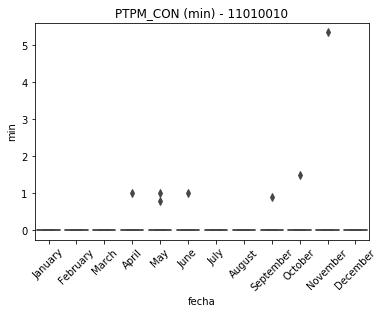

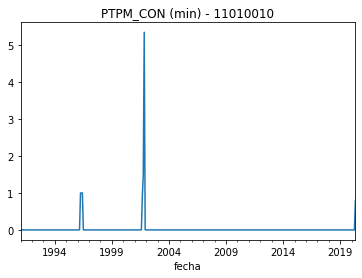

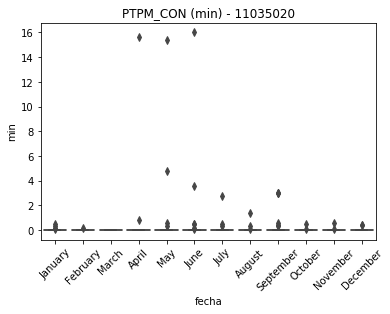

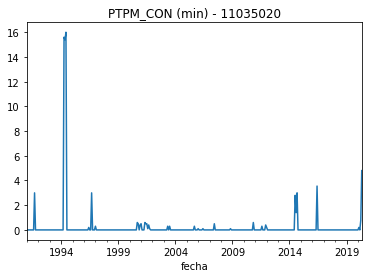

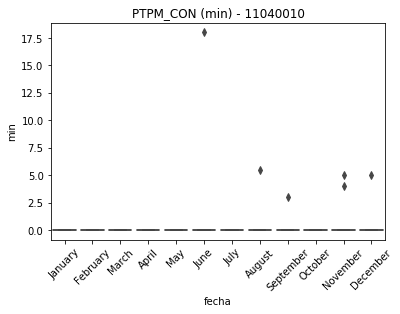

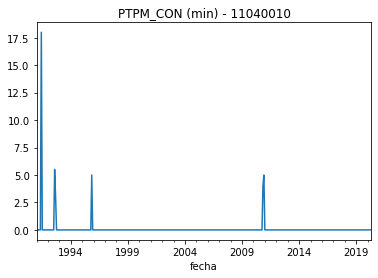

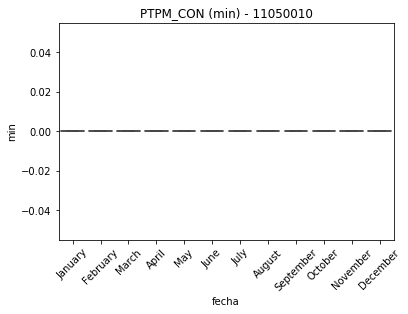

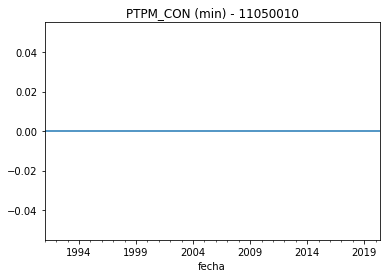

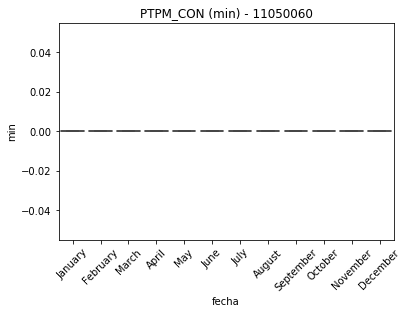

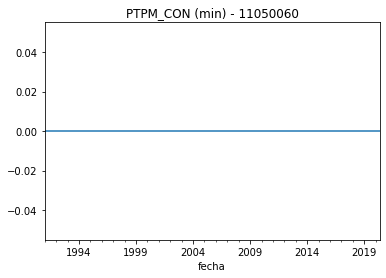

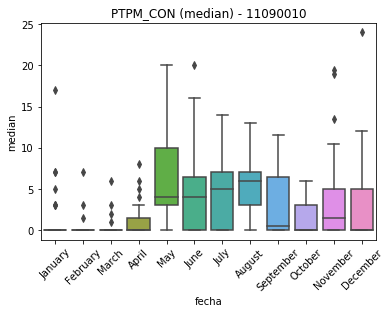

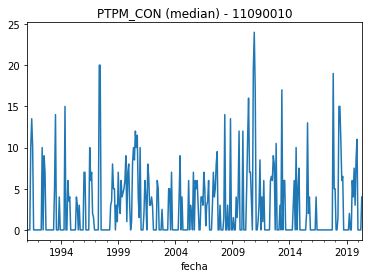

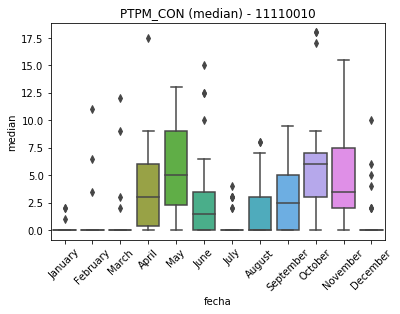

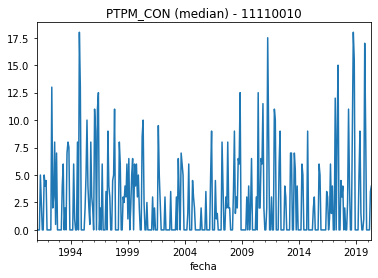

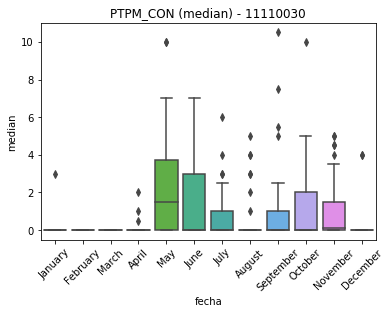

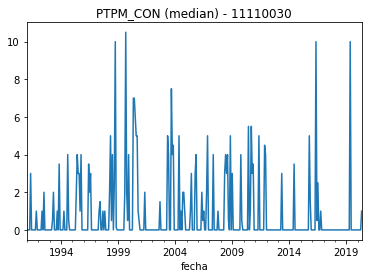

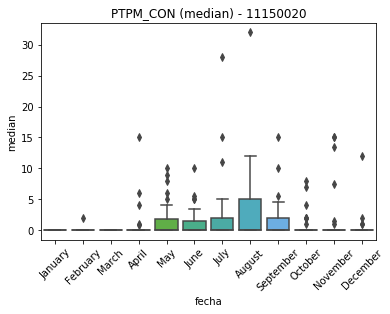

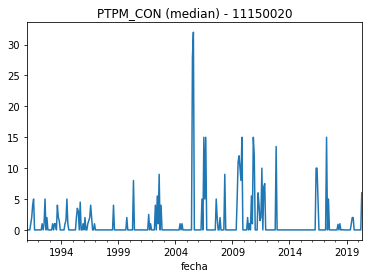

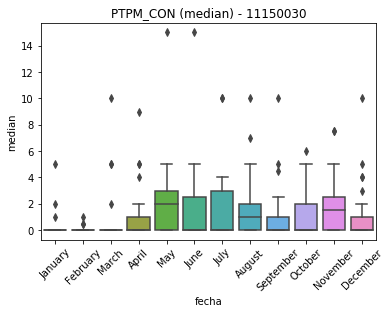

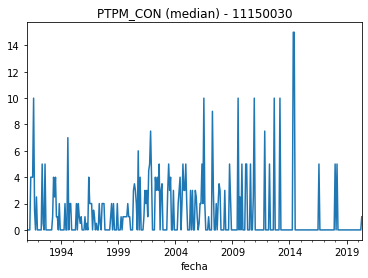

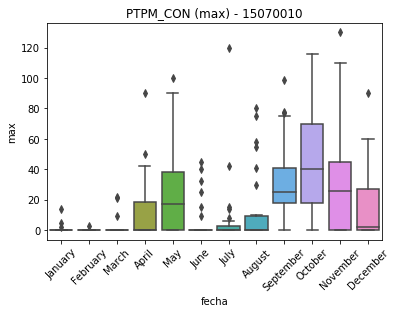

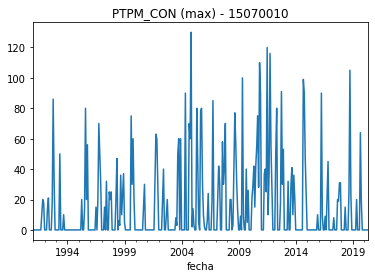

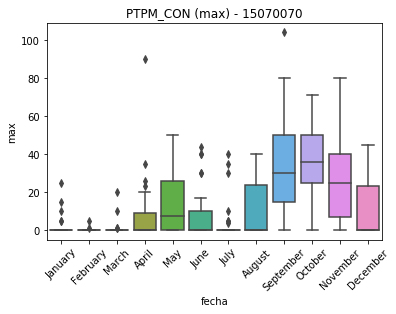

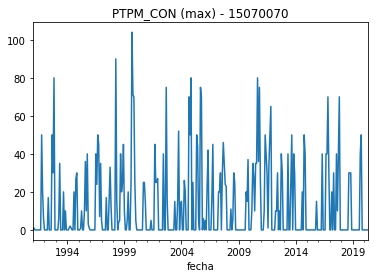

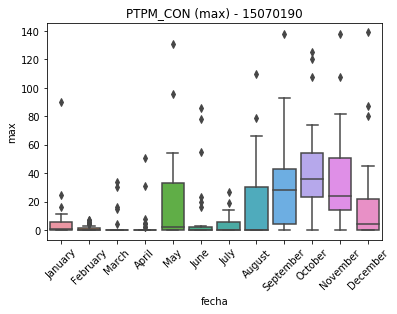

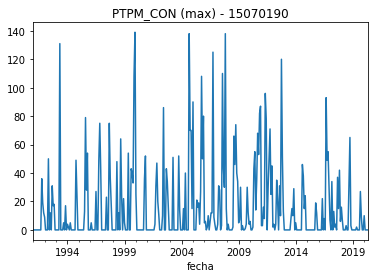

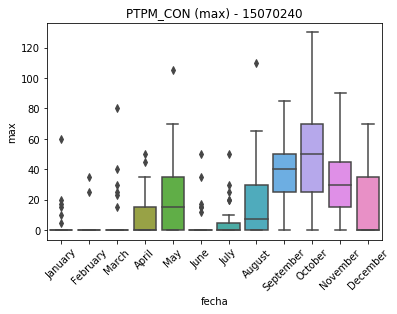

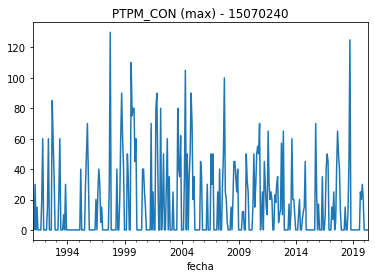

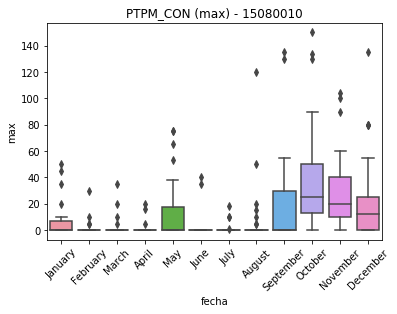

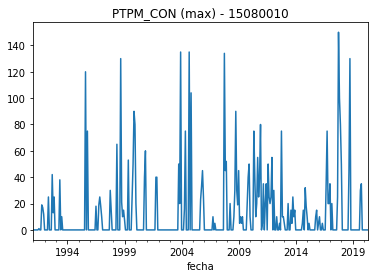

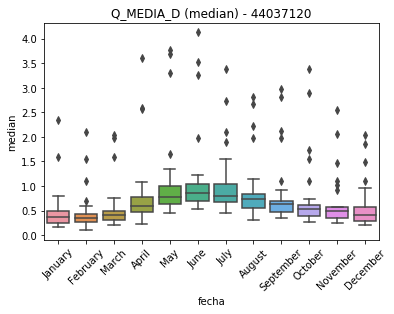

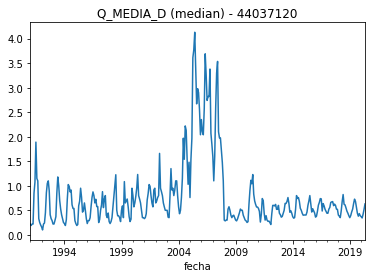

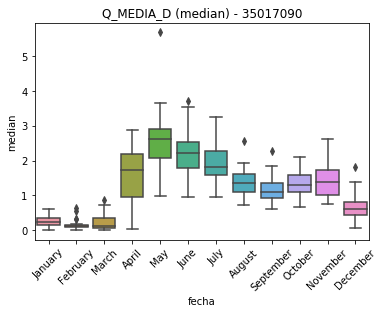

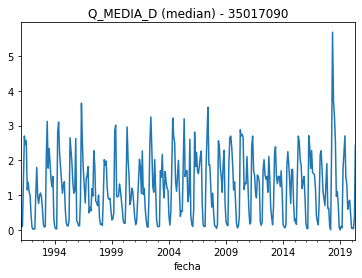

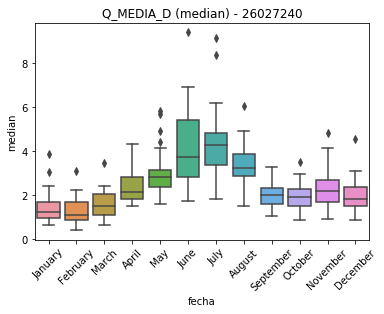

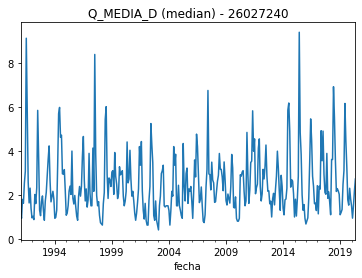

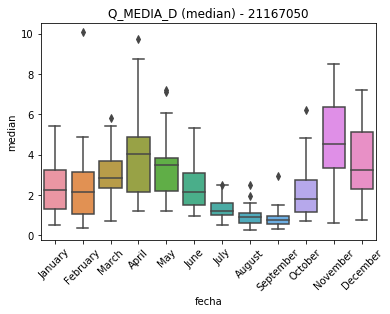

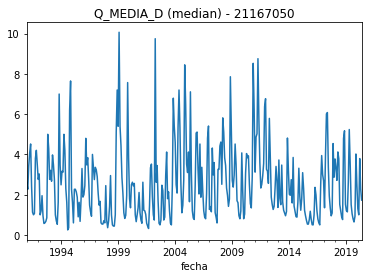

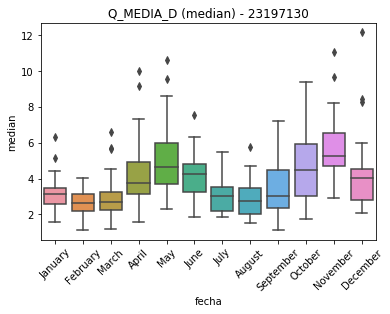

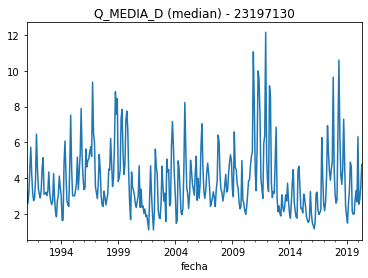

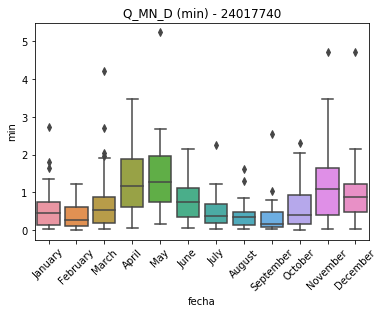

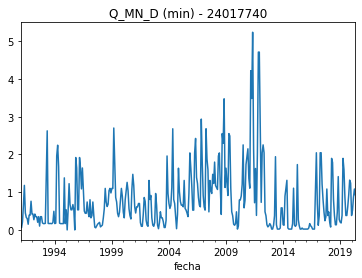

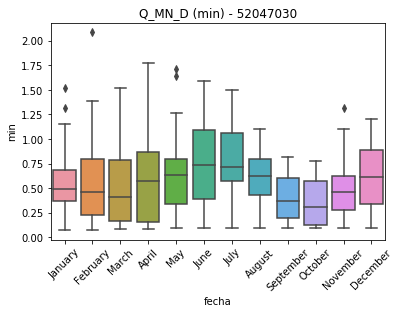

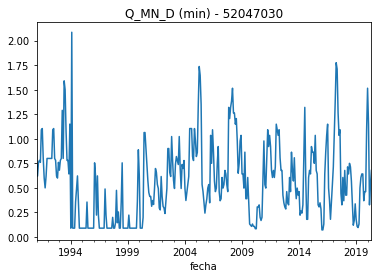

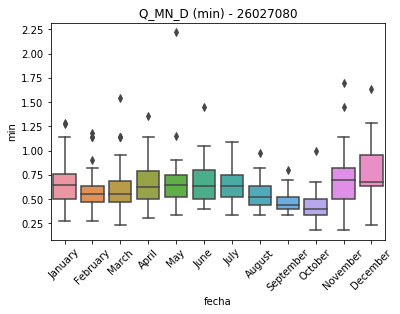

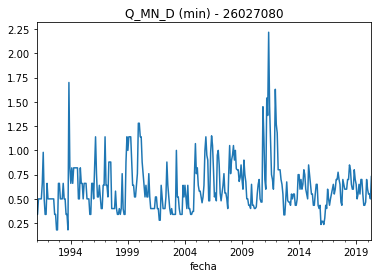

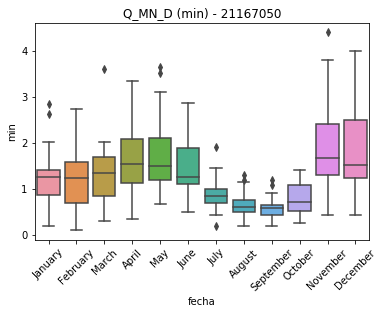

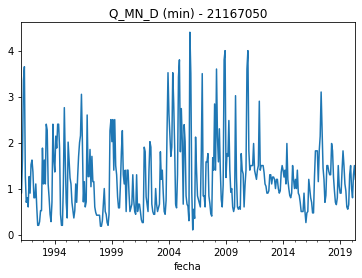

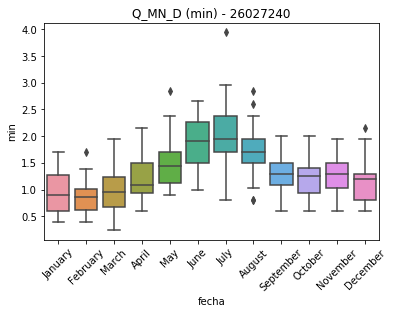

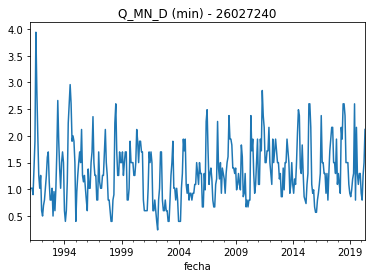

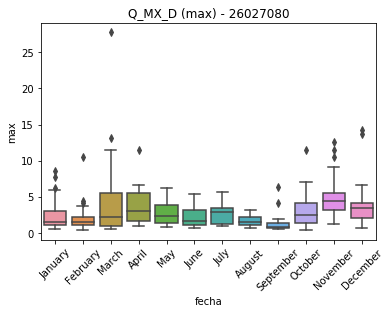

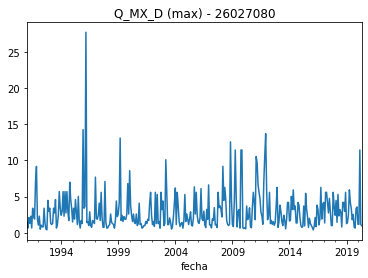

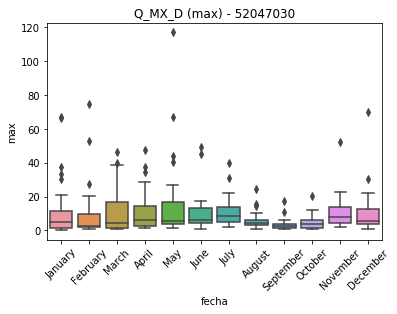

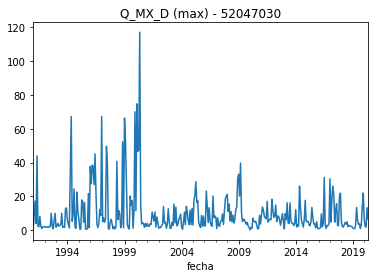

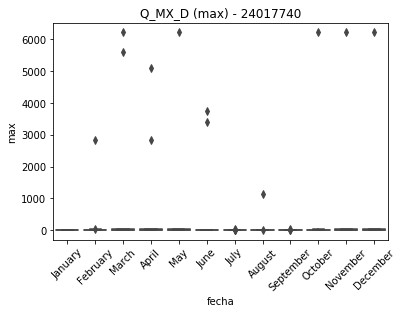

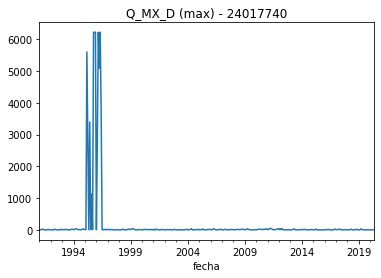

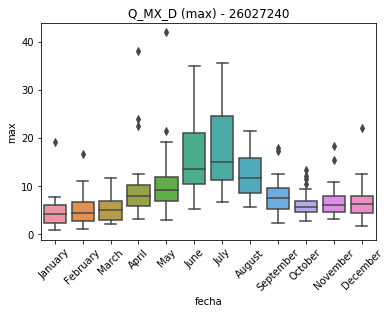

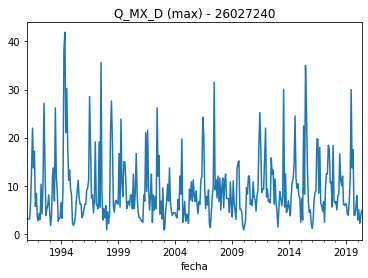

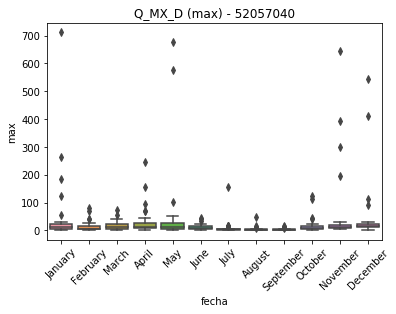

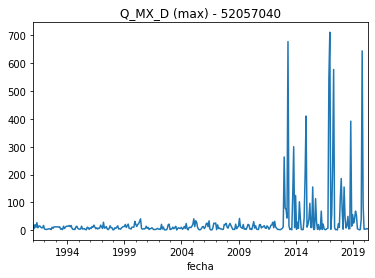

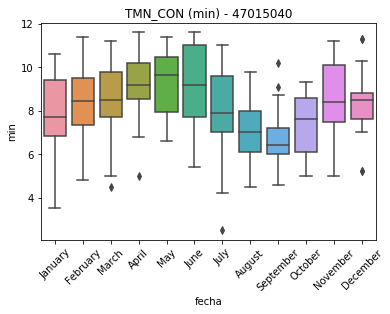

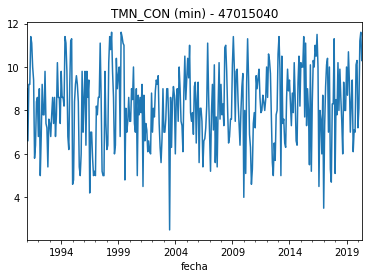

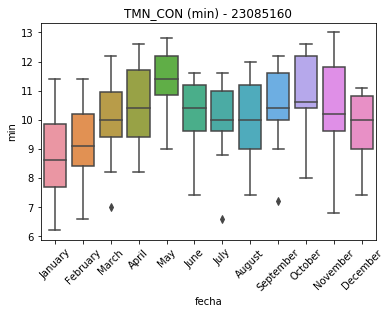

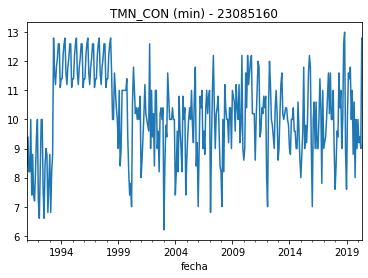

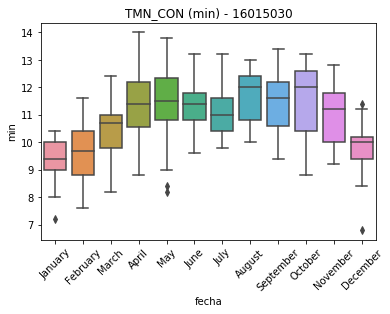

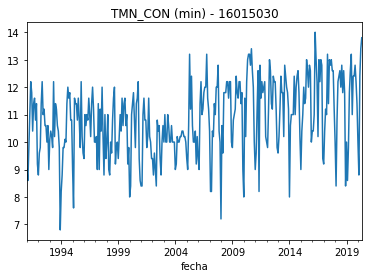

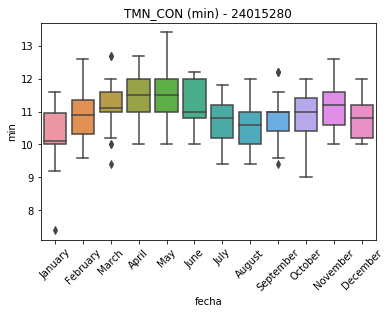

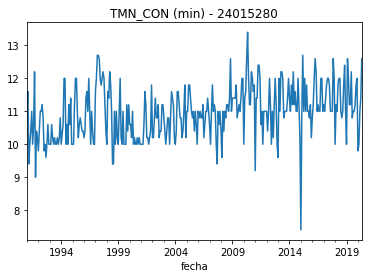

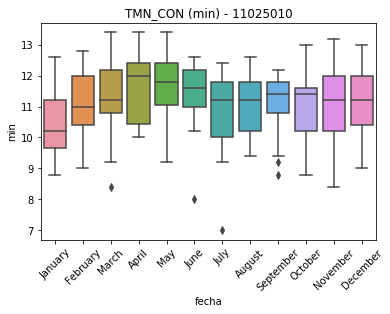

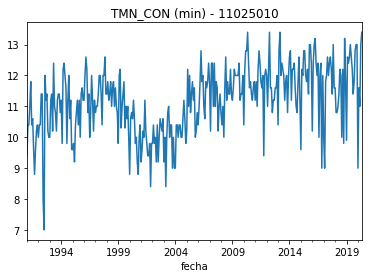

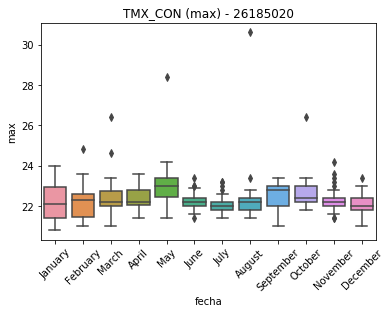

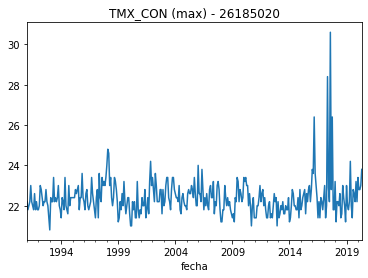

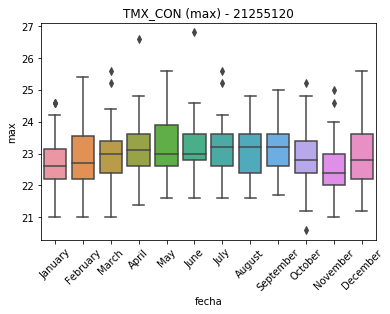

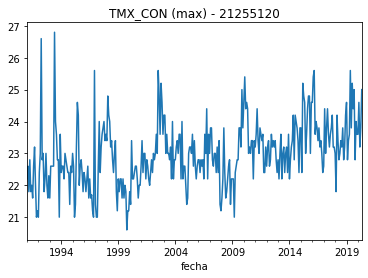

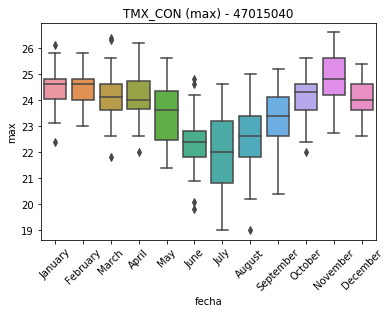

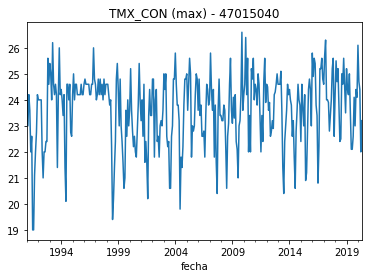

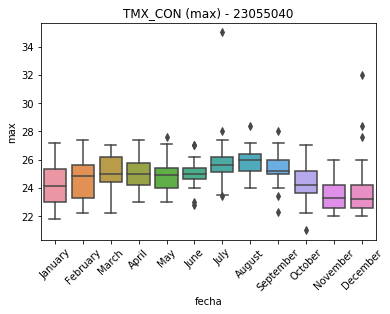

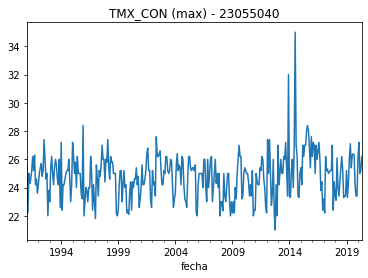

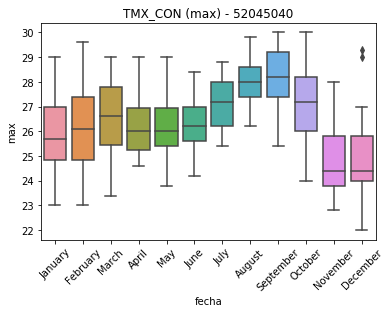

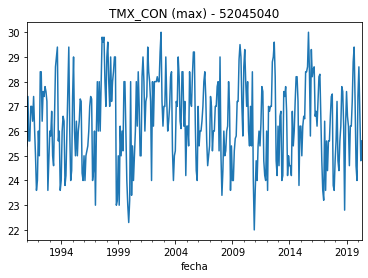

In [6]:
start_time = time.time()
res = process_files.processFiles(variable_files_path, explore)